Accuracy: 0.45


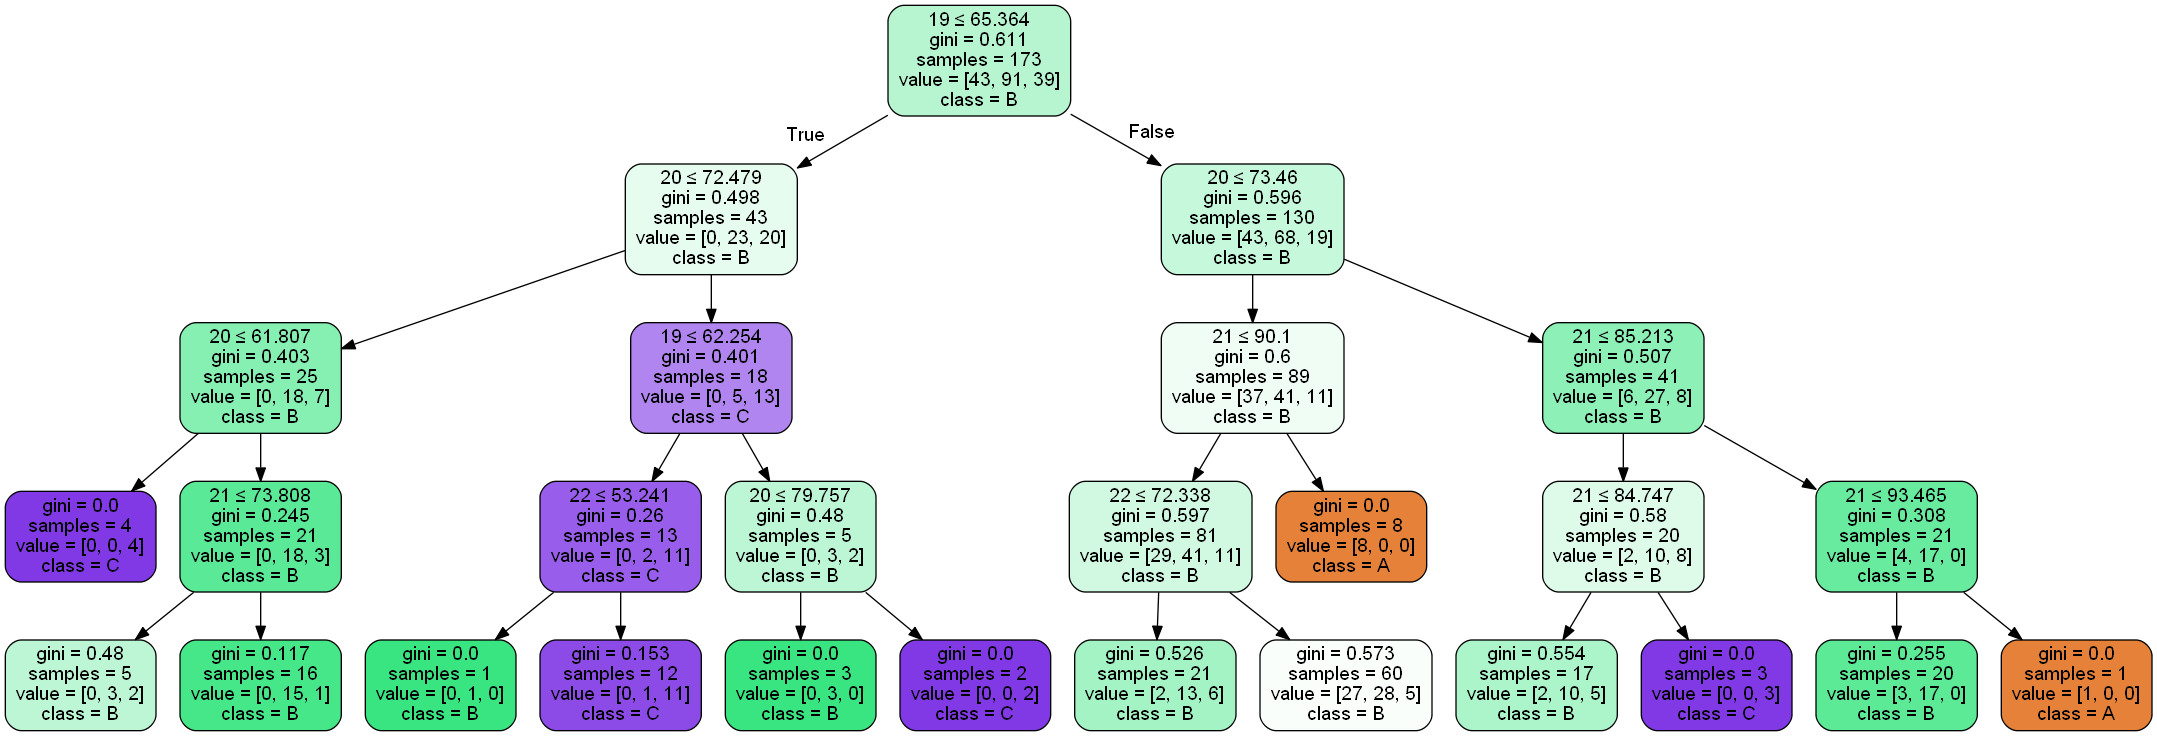

In [1]:
from sklearn import tree

file=open("db0816_hb.csv","rt")

fileMatrix=[]
lineContent = file.readline()
while lineContent!='':
    fileMatrix.append(lineContent.strip('\n').split(','))
    lineContent = file.readline()
file.close()


from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


#att 시작점 찾기 fileMatrix[0][len(fileMatrix[0])-3]



#X는 att의 값들, y는 class att의 값들
X = [fileMatrix[i][1:len(fileMatrix[0])-3] for i in range(1,len(fileMatrix))]

#당뇨병 +0, 고혈압 +1, 이상지질+2
y = [fileMatrix[i][len(fileMatrix[0])-3+2] for i in range(1,len(fileMatrix))]

for i in range(len(X)):
    X[i]=list(map(float,X[i]))


# 자동으로 데이터셋을 분리해주는 함수
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 데이터 표준화 작업
sc = StandardScaler()
sc.fit(X_train)


# 표준화된 데이터셋
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)



myTree = tree.DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)
myTree.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_pred_tr = myTree.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tr))


from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(myTree, out_file=None, feature_names=fileMatrix[0][1:len(fileMatrix[0])-3],
                          class_names=["A","B","C"], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())




Accuracy: 0.43
Accuracy: 0.48
Accuracy: 0.60


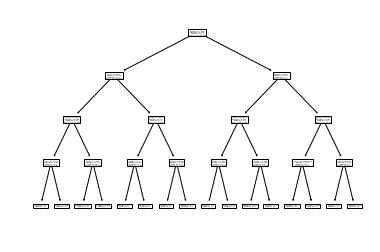

In [16]:


file=open("db0816_pe_hcs.csv","rt")

fileMatrix=[]
lineContent = file.readline()
while lineContent!='':
    fileMatrix.append(lineContent.strip('\n').split(','))
    lineContent = file.readline()
file.close()


from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.datasets import load_iris
from sklearn import tree

#att 시작점 찾기 fileMatrix[0][len(fileMatrix[0])-3]



#X는 att의 값들, y는 class att의 값들
X = [fileMatrix[i][1:len(fileMatrix[0])-3] for i in range(1,len(fileMatrix))]
for i in range(len(X)):
    X[i]=list(map(float,X[i]))


#당뇨병 +0, 고혈압 +1, 이상지질+2

for k in range(3):
    y = [fileMatrix[i][len(fileMatrix[0])-3+k] for i in range(1,len(fileMatrix))]

    

    # 자동으로 데이터셋을 분리해주는 함수
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # 데이터 표준화 작업
    sc = StandardScaler()
    sc.fit(X_train)


    # 표준화된 데이터셋
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)



    myTree = tree.DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)
    myTree.fit(X_train, y_train)

    from sklearn.metrics import accuracy_score

    y_pred_tr = myTree.predict(X_test)
    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tr))


    from sklearn.tree import export_graphviz
    import pydotplus
    from IPython.display import Image
    dot_data = export_graphviz(myTree, out_file=None, feature_names=fileMatrix[0][1:len(fileMatrix[0])-3],
                          class_names=["A","B","C"], filled=True, rounded=True, special_characters=True)
    
    graph = pydotplus.graph_from_dot_data(dot_data)
    
    tree.plot_tree(myTree) 
    import graphviz 
    
    
    dot_data = tree.export_graphviz(myTree, out_file=None) 
    graph = graphviz.Source(dot_data) 
    
    if (k==0):
        graph.render("tree_of_dia")
    elif (k==1):
        graph.render("tree_of_hbp")
    else:
        graph.render("tree_of_dys")
        


    
    graph = graphviz.Source(dot_data)  
    graph 
